# Fraud Detection

using the data set in https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../creditcard.csv')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83962,60107.0,1.086841,-0.321207,1.313493,0.818431,-1.218671,-0.105847,-0.749917,0.245737,0.770288,...,-0.023920,0.007170,0.036666,0.564267,0.164446,0.286845,0.004746,0.020905,28.00,0
87472,61698.0,1.315197,0.373218,-0.030413,0.493190,0.083141,-0.587420,0.109169,-0.184610,0.003180,...,-0.335904,-0.936328,0.017968,-0.492669,0.347018,0.145101,-0.020360,0.023456,1.98,0
270440,164079.0,-0.218678,0.608494,0.491205,-0.500529,0.613951,-1.083054,0.880325,-0.245375,-0.164669,...,-0.226639,-0.671591,0.044159,-0.014840,-0.132377,0.193177,-0.219612,-0.015442,4.49,0
243298,151874.0,-5.954760,3.985730,-2.253216,4.390419,-3.078755,0.966470,-0.375430,2.189529,-2.319086,...,-0.126415,-0.646309,-0.212055,0.076027,-0.003362,-0.141298,-3.781780,-1.972541,232.85,0
226169,144519.0,2.055618,0.682946,-3.150166,0.597500,1.367691,-1.249724,0.746882,-0.347442,-0.323332,...,-0.003718,0.193651,-0.050739,0.550247,0.370735,0.662582,-0.078566,-0.022028,0.76,0
201117,133736.0,-0.911697,1.147732,-1.690656,-0.448611,0.847535,0.601397,-0.074082,1.191753,-0.320061,...,0.445258,1.215036,-0.114914,-1.721451,-0.494957,-0.033902,0.068593,-0.013497,35.13,0
172236,121015.0,1.893520,-0.195959,-3.369590,0.176862,3.013585,3.060554,0.283787,0.560009,-0.314214,...,0.170227,0.294645,-0.048704,0.705090,0.478897,-0.472500,-0.028991,-0.055238,89.40,0
29311,35413.0,1.369744,-1.127655,0.295438,-1.338655,-1.338295,-0.566920,-0.833533,-0.169055,-1.968551,...,-0.143859,-0.103954,0.001764,0.078431,0.327638,-0.178947,0.034496,0.027439,71.50,0
7000,9164.0,1.322572,0.047363,0.232483,-0.283266,0.049825,0.114435,-0.361229,-0.068940,1.371634,...,-0.303672,-0.615348,-0.080649,-0.941509,0.265779,0.925063,-0.098345,-0.017186,8.91,0
87542,61729.0,0.990119,-0.196509,1.133480,1.050583,-0.173062,1.728862,-0.909741,0.687887,0.795915,...,0.105184,0.602559,0.133583,-0.965053,0.066521,-0.269902,0.139674,0.022321,1.00,0


In [9]:
data.duplicated().sum()

1081

In [10]:
new_data = data.drop_duplicates()

In [12]:
new_data.duplicated().sum()

0

In [13]:
new_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

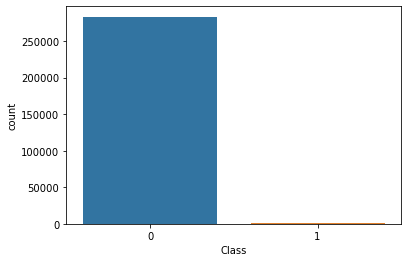

In [14]:
sns.countplot(x=new_data['Class'])

A very non balanced data!

In [15]:
v_features = new_data.iloc[:, 0:29].columns

In [23]:
v_features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [22]:
import matplotlib.gridspec as gridspec

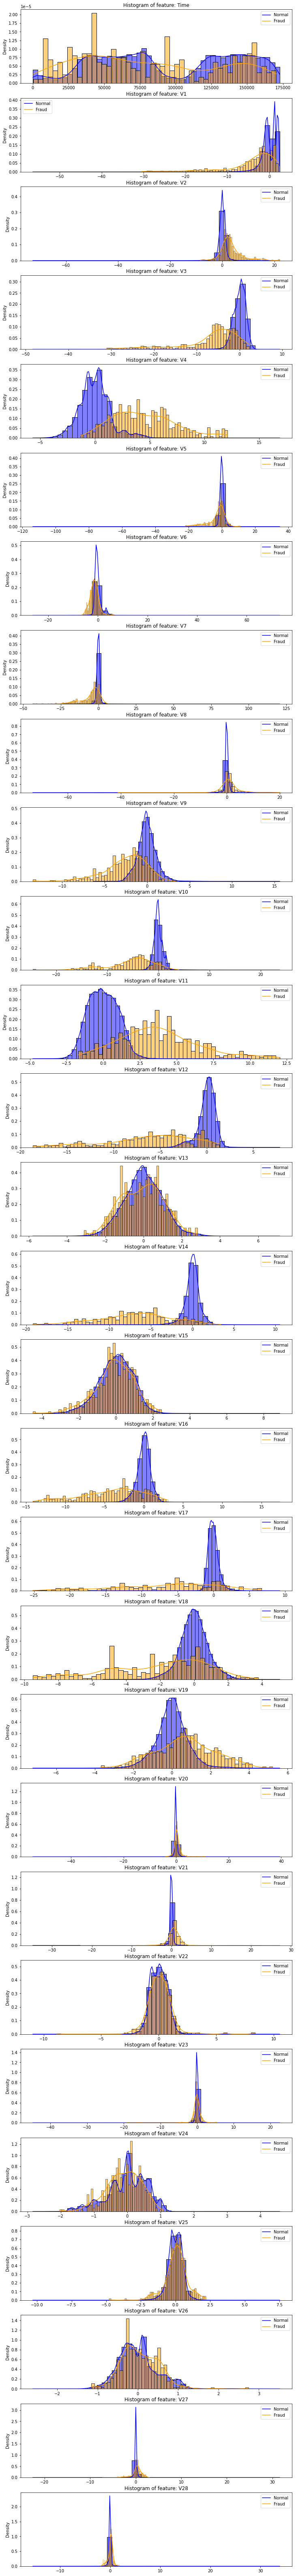

In [25]:
plt.figure(figsize=(12, 29*4))
gs = gridspec.GridSpec(29, 1)

for i, col in enumerate(new_data[v_features]):
    ax = plt.subplot(gs[i])
    sns.histplot(new_data[col][new_data.Class == 0], bins = 50, color="blue", stat="density", kde=True)
    sns.histplot(new_data[col][new_data.Class == 1], bins = 50, color="orange", stat="density", kde=True)
    plt.legend(["Normal","Fraud"])
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: ' + str(col))

plt.show()

We will drop other anonymous features where normal and fraud distributions are similar (V13, V15, V20, V22 - V26, V28)

In [26]:
new_data.drop(['V13', 'V15', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26', 'V28'], axis = 1, inplace=True)

c:\PythonStuff\anaconda3\envs\fluffy\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
amount = new_data['Amount'].values
new_data['Amount'] = sc.fit_transform(amount.reshape(-1,1))

<ipython-input-28-6eba43debd70>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Amount'] = sc.fit_transform(amount.reshape(-1,1))


In [30]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V14,V16,V17,V18,V19,V21,V27,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0.133558,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,-0.008983,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,-0.055353,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0.062723,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,0.219422,-0.073813,0


Now we are done cleaning and scalling the data. We will move on to training or dataset.

## Training the model
Split the data! 70% for training and 30% for testing!

In [31]:
from sklearn.model_selection import train_test_split

X = new_data.drop(['Class'], axis=1).values
Y = new_data['Class'].values

X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3)

print(len(X_train), len(X_test), len(X_train) + len(X_test))

198608 85118 283726


In [33]:
"""import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix"""

"import os\nimport warnings\nwarnings.filterwarnings('ignore')\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn import metrics\nfrom sklearn.impute import MissingIndicator, SimpleImputer\nfrom sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer, FunctionTransformer\nfrom sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler\nfrom sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder\nimport statsmodels.formula.api as smf\nimport statsmodels.tsa as tsa\nfrom sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge\nfrom sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor\nfrom sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor\nfrom sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor\nfrom sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, Ad

### Decision Tree Classifier

In [35]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [36]:
DT = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy')
DT.fit(X_train, Y_train)
DT_yhat = DT.predict(X_test)

In [37]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('Accuracy score of the Decision Tree Model is {}'.format(accuracy_score(Y_test, DT_yhat)))

Accuracy score of the Decision Tree Model is 0.9992481026339904


In [38]:
print('F1 score of the Decision Tree Model is {}'.format(f1_score(Y_test, DT_yhat)))

F1 score of the Decision Tree Model is 0.7611940298507464


In [39]:
confusion_matrix(Y_test, DT_yhat, labels=[0,1])

array([[84952,     8],
       [   56,   102]], dtype=int64)

### K-nearest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN.fit(X_train, Y_train)
KNN_yhat = KNN.predict(X_test)

In [41]:
print('Accuracy score of the KNN model is {}'.format(accuracy_score(Y_test, KNN_yhat)))
print('F1 score of the KNN model is {}'.format(f1_score(Y_test, KNN_yhat)))
confusion_matrix(Y_test, KNN_yhat, labels = [0,1])

Accuracy score of the KNN model is 0.9982377405484152
F1 score of the KNN model is 0.09638554216867469


array([[84960,     0],
       [  150,     8]], dtype=int64)

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
LR = LogisticRegression()
LR.fit(X_train, Y_train)
LR_yhat = LR.predict(X_test)

In [43]:
print('Accuracy score of logistic regression is {}'.format(accuracy_score(Y_test, LR_yhat)))
print('F1 score of logistic regression is {}'.format(f1_score(Y_test, LR_yhat)))
confusion_matrix(Y_test, LR_yhat, labels = [0, 1])

Accuracy score of logistic regression is 0.9987076764021711
F1 score of logistic regression is 0.6071428571428572


array([[84923,    37],
       [   73,    85]], dtype=int64)

### SVC

In [45]:
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
svm = SVC()
svm.fit(X_train, Y_train)
svm_yhat = svm.predict(X_test)

In [46]:
print('Accuracy score of the SVM model is {}'.format(accuracy_score(Y_test, svm_yhat)))
print('F1 score of the SVM model is {}'.format(f1_score(Y_test, svm_yhat)))
confusion_matrix(Y_test, svm_yhat, labels=[0,1])

Accuracy score of the SVM model is 0.9981437533776639
F1 score of the SVM model is 0.0


array([[84960,     0],
       [  158,     0]], dtype=int64)

### Random Forest

In [49]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
RF = RandomForestClassifier(max_depth = 4)
RF.fit(X_train, Y_train)
RF_yhat = RF.predict(X_test)

In [50]:
print('Accuracy score of the random forest model is {}'.format(accuracy_score(Y_test, RF_yhat)))
print('F1 score of the random forest model is {}'.format(f1_score(Y_test, RF_yhat)))
confusion_matrix(Y_test, RF_yhat, labels=[0,1])

Accuracy score of the random forest model is 0.9992363542376466
F1 score of the random forest model is 0.7528517110266159


array([[84954,     6],
       [   59,    99]], dtype=int64)